# Efectos Mixtos - Ej5 - ejercicios_mixtos.pdf

Mismo ejercicio pero para tratar como si fuesen: 

- 2 factores fijos
- 1 fijo y 1 aleatorio
- 2 aleatorios

Lectura de datos y conversión a factor:

In [2]:
datos = read.csv("datos/ej5_ejercicios_mixtos.csv", sep=";")
str(datos)
attach(datos)
velocidadf = as.factor(velocidad)
alimentacionf = as.factor(alimentacion)

'data.frame':	16 obs. of  3 variables:
 $ fuerza      : num  2.7 2.78 2.83 2.86 2.45 2.49 2.85 2.8 2.6 2.72 ...
 $ velocidad   : int  125 125 200 200 125 125 200 200 125 125 ...
 $ alimentacion: num  0.015 0.015 0.015 0.015 0.03 0.03 0.03 0.03 0.045 0.045 ...


## Modelos

### Modelo: 2 efectos fijos

- $\alpha$ (i): velocidad
- $\beta$ (j): alimentacion

$$y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha \beta)_{ij} + \epsilon_{ijk}$$

**Gráficos exploratorios**

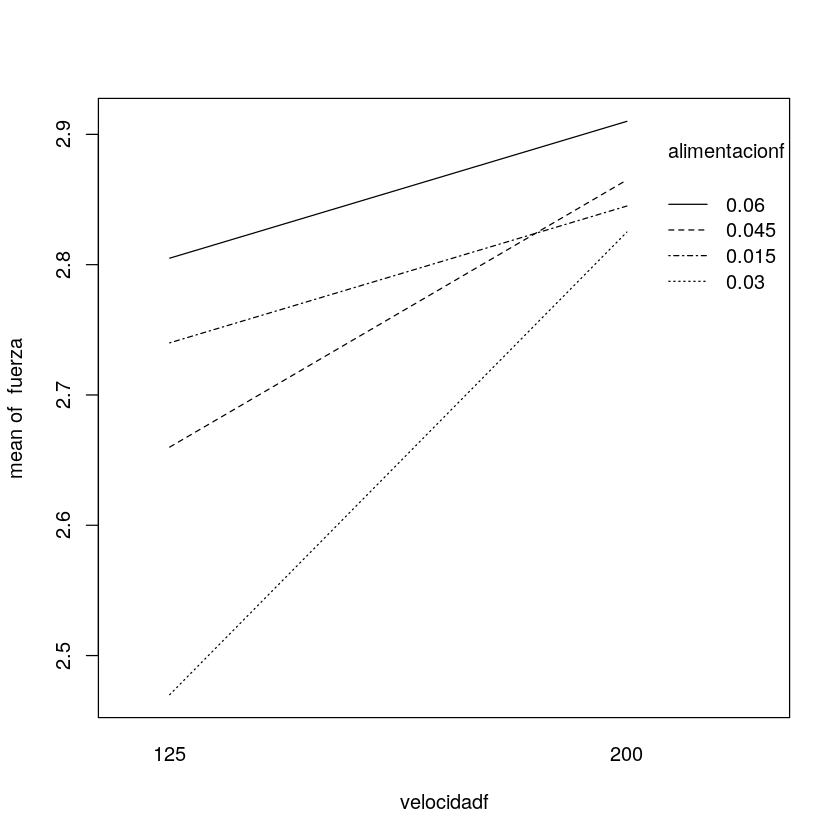

In [3]:
interaction.plot(velocidadf, alimentacionf, fuerza)

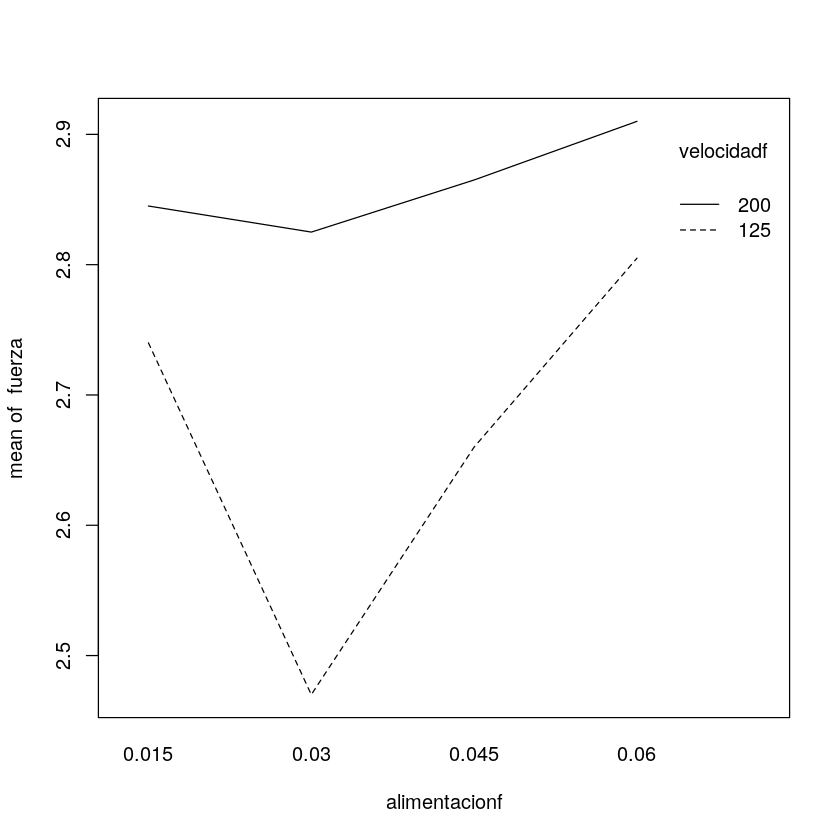

In [4]:
interaction.plot(alimentacionf, velocidadf, fuerza)

De los gráficos podemos inferir que la existe una interacción pero no parece ser muy significativa (interacción leve).


A continuación hacemos la tabla anova para analizar numéricamente si son significativos los factores y su combinación:

In [5]:
m1 = aov(fuerza~velocidadf*alimentacionf)
summary(m1)

                         Df  Sum Sq Mean Sq F value   Pr(>F)    
velocidadf                1 0.14823 0.14823  57.010 6.61e-05 ***
alimentacionf             3 0.09250 0.03083  11.859  0.00258 ** 
velocidadf:alimentacionf  3 0.04187 0.01396   5.369  0.02557 *  
Residuals                 8 0.02080 0.00260                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Vemos que son significativas tanto la interacción de la velocidad con la alimentación como cada factor individualmente. 

Ahora veamos si se cumplen los **supuestos de normalidad y igualdad de varianzas**.

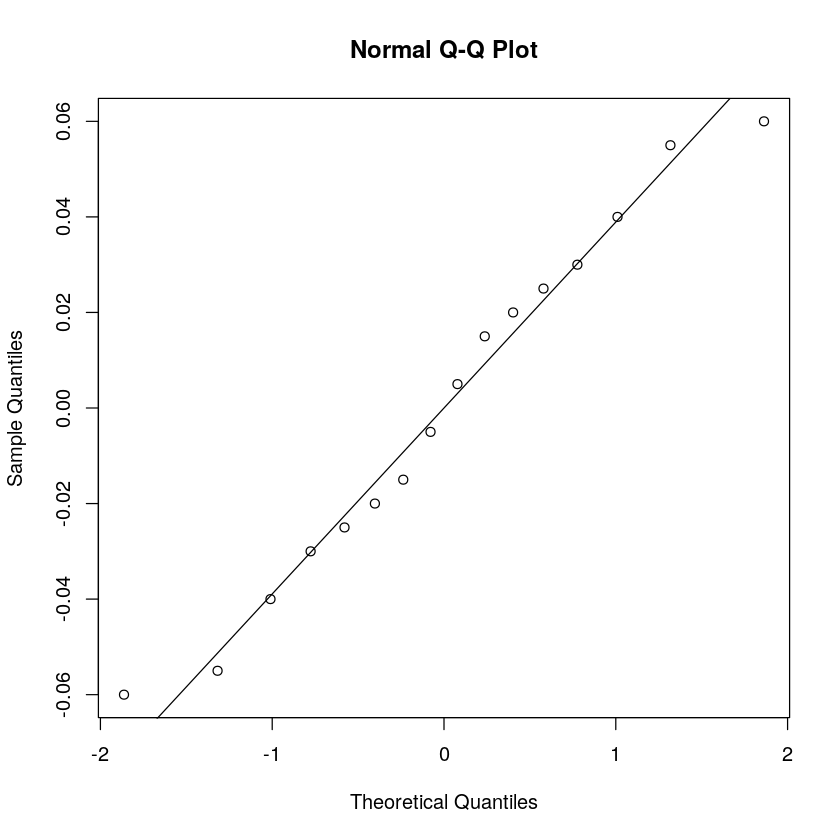

In [25]:
qqnorm(m1$residuals)
qqline(m1$residuals)

In [6]:
shapiro.test(m1$residuals)


	Shapiro-Wilk normality test

data:  m1$residuals
W = 0.96815, p-value = 0.8078


In [7]:
library(car)
leveneTest(m1)

Loading required package: carData
Warning message in anova.lm(lm(resp ~ group)):
“ANOVA F-tests on an essentially perfect fit are unreliable”

,Df,F value,Pr(>F)
group,7,1.030707e+28,3.546276e-111
,8,NA,NA


Vemos que el test de levene no es confiable debido a que son muy pocas observaciones, aún así debemos elegir si intentar hacer una transformación para ver si mejora. Analizamos el gráfico de BoxCox, corroborando si el 1 se encuentra en la banda de confianza. 

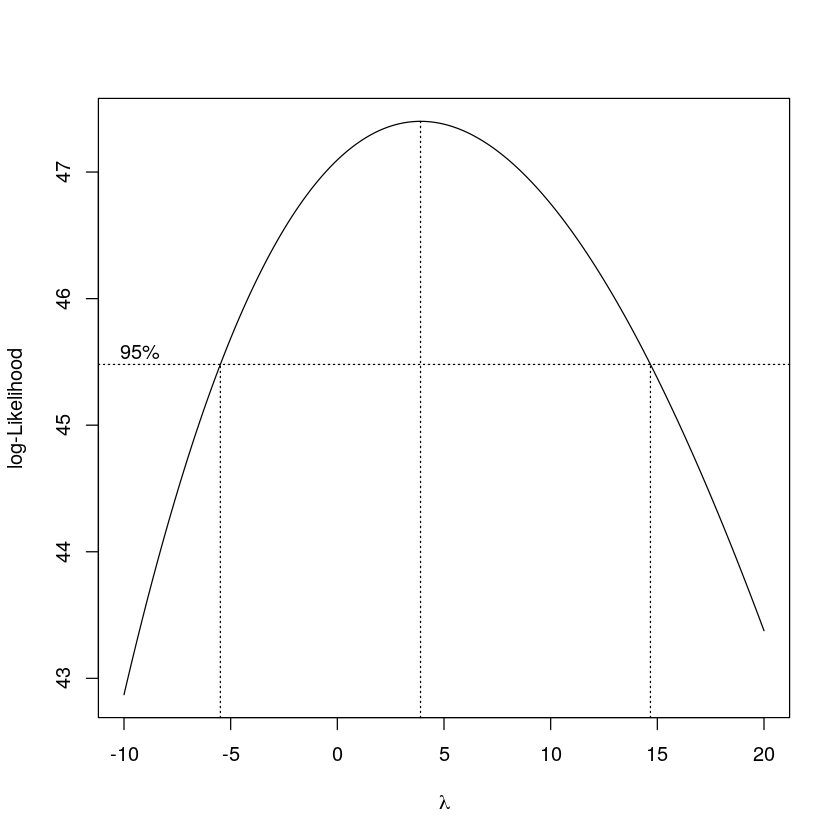

In [9]:
library(MASS)
boxcox(m1, lambda = seq(-10, 20, 1/10))

<font color='red'>
¿Por qué la banda de confianza nos da tan amplia, está bien esto? ¿La transformación de BOXCOX se utiliza cuando al menos alguno de los supuestos no se cumplen (varianza constante o normalidad)?
</font>    

Como es significativa la interacción entre los factores fijos, no podemos analizarlos en forma independiente, de aquí que no tiene sentido ver un gráfico boxplot tomando los factores separados. 

Debido a esta razón creamos un factor que sea la combinación de ambos para luego sí hacer comparaciones múltiples usando el método de Tukey que compara todos contra todos.

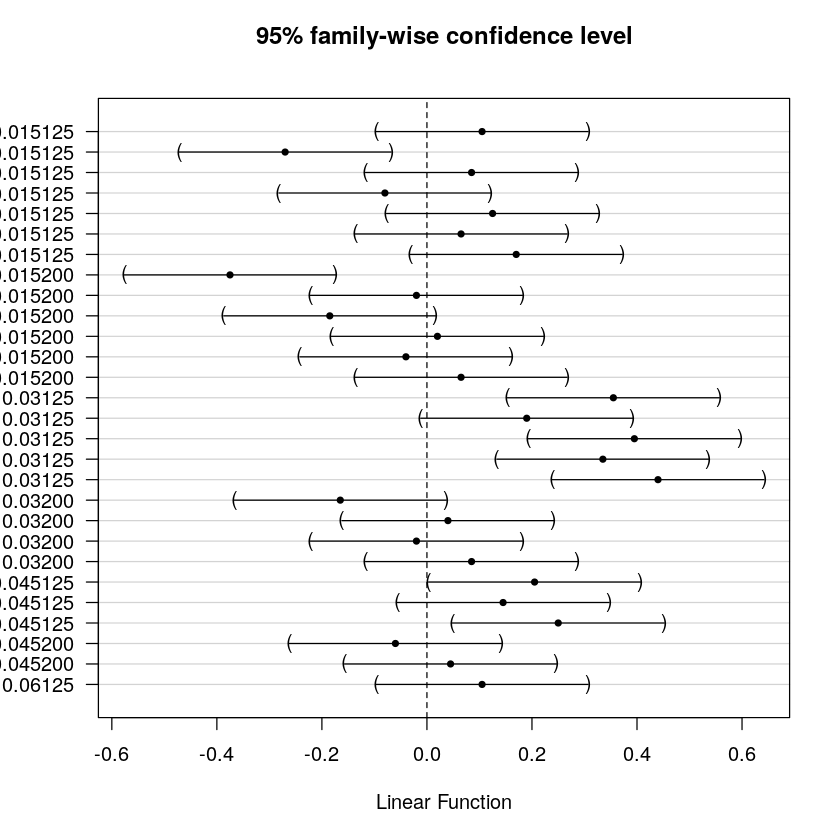

In [11]:
fav = factor(paste0(alimentacionf,velocidadf))
library(multcomp)
modelo = aov(fuerza~fav)
mc = glht(modelo, linfct = mcp(fav="Tukey"))
plot(mc)

In [12]:
# Esto para ver las comparaciones que hace ya que no se ve en la gráfica
print(mc)


	 General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Linear Hypotheses:
                         Estimate
0.015200 - 0.015125 == 0    0.105
0.03125 - 0.015125 == 0    -0.270
0.03200 - 0.015125 == 0     0.085
0.045125 - 0.015125 == 0   -0.080
0.045200 - 0.015125 == 0    0.125
0.06125 - 0.015125 == 0     0.065
0.06200 - 0.015125 == 0     0.170
0.03125 - 0.015200 == 0    -0.375
0.03200 - 0.015200 == 0    -0.020
0.045125 - 0.015200 == 0   -0.185
0.045200 - 0.015200 == 0    0.020
0.06125 - 0.015200 == 0    -0.040
0.06200 - 0.015200 == 0     0.065
0.03200 - 0.03125 == 0      0.355
0.045125 - 0.03125 == 0     0.190
0.045200 - 0.03125 == 0     0.395
0.06125 - 0.03125 == 0      0.335
0.06200 - 0.03125 == 0      0.440
0.045125 - 0.03200 == 0    -0.165
0.045200 - 0.03200 == 0     0.040
0.06125 - 0.03200 == 0     -0.020
0.06200 - 0.03200 == 0      0.085
0.045200 - 0.045125 == 0    0.205
0.06125 - 0.045125 == 0     0.145
0.06200 - 0.045125 == 0     0.250
0.06125 - 0.045200

Como el factor *rapidez de la alimentación* es cuantitativo podemos realizar un análisis de tendencia, del siguiente modo:

In [27]:
g = 4
contrasts(alimentacionf) = contr.poly(g, scores = c(0.015, 0.030, 0.045, 0.060)) 
modelot = aov(fuerza~velocidadf*alimentacionf)
summary.lm(modelot) 


Call:
aov(formula = fuerza ~ velocidadf * alimentacionf)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06000 -0.02625  0.00000  0.02625  0.06000 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2.66875    0.01803 148.036 4.85e-15 ***
velocidadf200                  0.19250    0.02550   7.550 6.61e-05 ***
alimentacionf.L                0.08609    0.03606   2.388 0.044016 *  
alimentacionf.Q                0.20750    0.03606   5.755 0.000427 ***
alimentacionf.C               -0.11292    0.03606  -3.132 0.013976 *  
velocidadf200:alimentacionf.L -0.03354    0.05099  -0.658 0.529140    
velocidadf200:alimentacionf.Q -0.17500    0.05099  -3.432 0.008928 ** 
velocidadf200:alimentacionf.C  0.10062    0.05099   1.973 0.083904 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05099 on 8 degrees of freedom
Multiple R-squared:  0.9314,	Adjusted R-squared:  0.8715 
F

Calculamos un **nuevo $\alpha$** para comparar, usando Bonferroni $\alpha_{PC} = 1 - (1- \alpha_{0QueQuiero})^{1/7}$, donde $\alpha_{0QueQuiero} = 0.05$. Según este nuevo $\alpha$ veremos las relaciones donde $pvalor<0.0073$.

In [31]:
cant_comp = 7
alpha = 0.05
(alpha_PC = 1 - (1- alpha)^(1/cant_comp))

[1] 0.007300832

<font color='red'>
Vemos que el único pvalor inferior al nuevo $\alpha$ es el correspondiente a alimentacionf.Q, ¿Esta bien esto? ¿por qué no nos aparece ningún pvalor inferior al nuevo $\alpha$ en las interacciones?
</font>    

### Modelo: 1 efecto fijo y 1 aleatorio

#### Velocidad (fija) y alimentación (aleatorio)

- $\alpha$ (i): velocidad
- $B$ (j): alimentacion

$$y_{ijk} = \mu + \alpha_i + B_j + (\alpha B)_{ij} + \epsilon_{ijk}$$

Veamos un gráfico exploratorio boxplot:

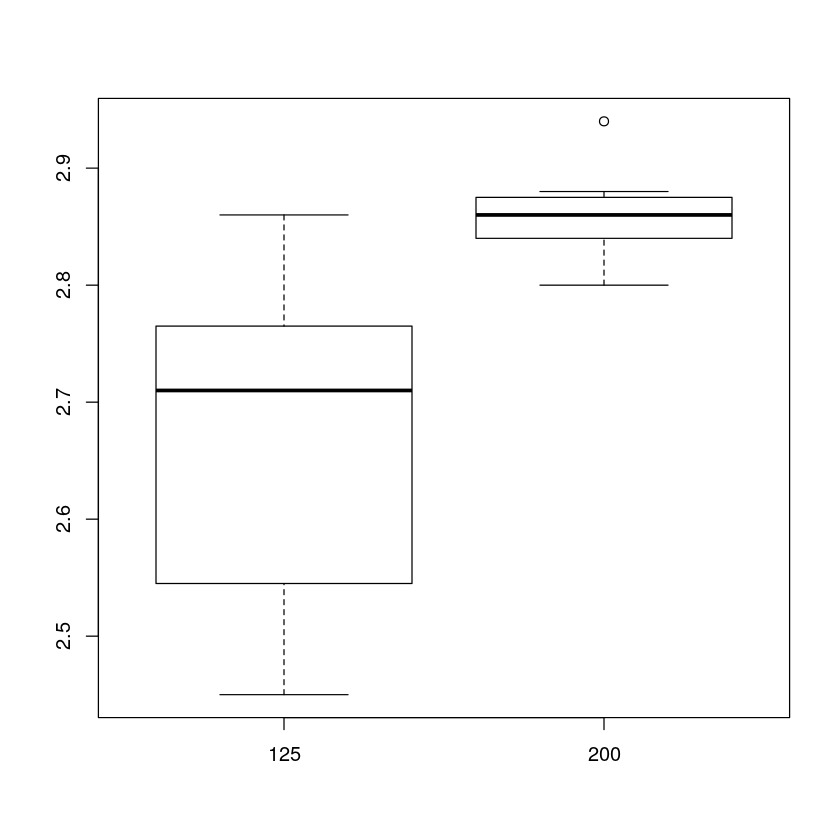

In [20]:
boxplot(fuerza~velocidadf)

In [13]:
library(lme4)
m2 = lmer(fuerza~velocidadf + (1|alimentacionf) 
          + (1|velocidadf:alimentacionf))
summary(m2)
confint(m2)

Loading required package: Matrix


Linear mixed model fit by REML ['lmerMod']
Formula: 
fuerza ~ velocidadf + (1 | alimentacionf) + (1 | velocidadf:alimentacionf)

REML criterion at convergence: -27

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.20366 -0.58317 -0.08913  0.58432  1.39143 

Random effects:
 Groups                   Name        Variance Std.Dev.
 velocidadf:alimentacionf (Intercept) 0.005679 0.07536 
 alimentacionf            (Intercept) 0.004219 0.06495 
 Residual                             0.002600 0.05099 
Number of obs: 16, groups:  velocidadf:alimentacionf, 8; alimentacionf, 4

Fixed effects:
              Estimate Std. Error t value
(Intercept)    2.66875    0.05291  50.439
velocidadf200  0.19250    0.05907   3.259

Correlation of Fixed Effects:
            (Intr)
velocddf200 -0.558

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.00000000,0.15118683
.sig02,0.00000000,0.17951358
.sigma,0.03345319,0.09151009
(Intercept),2.56318754,2.77431245
velocidadf200,0.06343907,0.32155936


Vemos que tanto la interacción de velocidad y alimentación como la alimentación no tienen efecto significativo ya que los IC tienen el cero en su límite inferior. De esto modo ahora corroboraremos si el factor fijo tiene efecto significativo comparando con un test el modelo completo contra uno reducido. 

In [14]:
mcompleto = lmer(fuerza~velocidadf + (1|alimentacionf) 
                 + (1|velocidadf:alimentacionf), REML = FALSE)
mreducido = lmer(fuerza~1 + (1|alimentacionf) 
                 + (1|velocidadf:alimentacionf), REML = FALSE)
anova(mcompleto, mreducido)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mreducido,4,-20.95723,-17.86688,14.47862,-28.95723,NA,NA,NA
mcompleto,5,-25.51672,-21.65378,17.75836,-35.51672,6.559492,1,0.01043262


Como vemos un pvalor es chico (<0.05) podemos rechazar la H0, pero, el test anova usa una distribución chi2 para construir el pvalor que podría darnos mal porque es aproximada, esto es bueno cuando tenemos un n grande, sino no es muy confiable. ¿Puedo hacer algo mejor? usamos esta otra lib

In [17]:
library(pbkrtest)
KRmodcomp(mcompleto,mreducido)

F-test with Kenward-Roger approximation; computing time: 0.06 sec.
large : fuerza ~ velocidadf + (1 | alimentacionf) + (1 | velocidadf:alimentacionf)
small : fuerza ~ 1 + (1 | alimentacionf) + (1 | velocidadf:alimentacionf)
        stat    ndf    ddf F.scaling p.value  
Ftest 10.619  1.000  3.000         1 0.04718 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Vemos que con este método volvemos a obtener un pvalor menor a la significancia por lo que no contradice el test anova previo, así que corroboramos que ambos modelos no son equivalentes por lo concluímos que el efecto fijo de la velocidad es significativo.

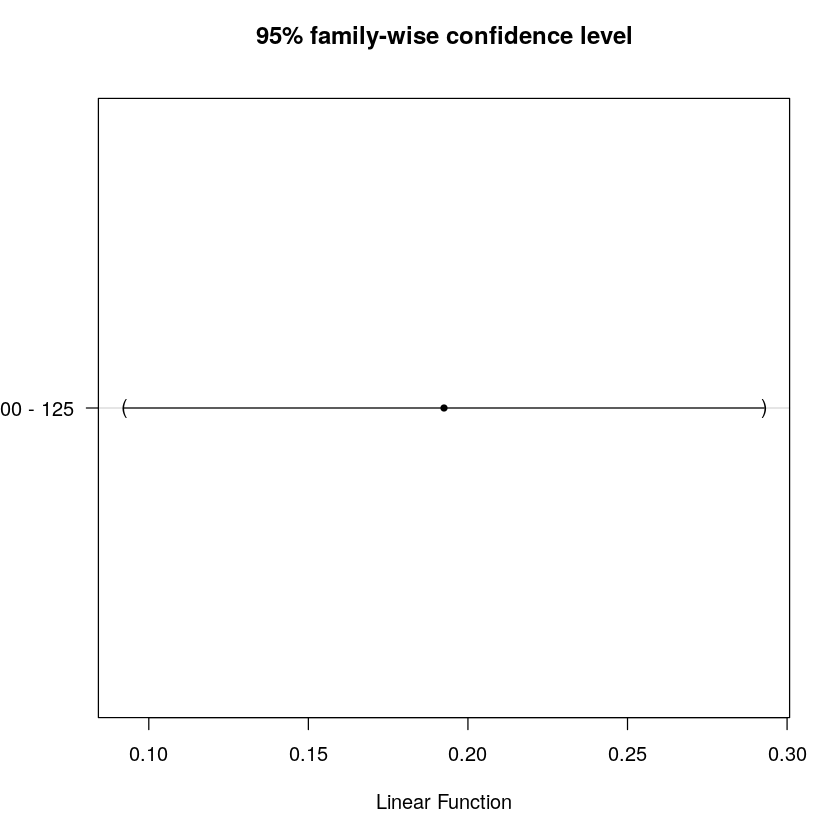

In [19]:
mc2 = glht(mcompleto, linfct=mcp(velocidadf="Tukey"))
plot(mc2)

Podemos concluir que no son estadísticamente equivalentes los dos tipos de velocidades. Veamos qué sucede teniendo en cuenta el siguiente modelo, que intercambia el factor fijo con el aleatorio:

#### Alimentación (fija) y velocidad (aleatorio)

- $A$ (i): velocidad
- $\beta$ (j): alimentacion

$$y_{ijk} = \mu + A_i + \beta_j + (A \beta)_{ij} + \epsilon_{ijk}$$

In [21]:
m3 = lmer(fuerza~alimentacionf + (1|velocidadf) 
          + (1|velocidadf:alimentacionf))
summary(m3)
confint(m3)

Linear mixed model fit by REML ['lmerMod']
Formula: 
fuerza ~ alimentacionf + (1 | velocidadf) + (1 | velocidadf:alimentacionf)

REML criterion at convergence: -22.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2326 -0.6721  0.0101  0.5513  1.2053 

Random effects:
 Groups                   Name        Variance Std.Dev.
 velocidadf:alimentacionf (Intercept) 0.005679 0.07536 
 velocidadf               (Intercept) 0.016783 0.12955 
 Residual                             0.002600 0.05099 
Number of obs: 16, groups:  velocidadf:alimentacionf, 8; velocidadf, 2

Fixed effects:
                   Estimate Std. Error t value
(Intercept)         2.79250    0.10900  25.619
alimentacionf0.03  -0.14500    0.08354  -1.736
alimentacionf0.045 -0.03000    0.08354  -0.359
alimentacionf0.06   0.06500    0.08354   0.778

Correlation of Fixed Effects:
            (Intr) al0.03 a0.045
almntcn0.03 -0.383              
almntc0.045 -0.383  0.500       
almntcn0.06 -0.383  0.500  0.500

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.00000000,0.112976825
.sig02,0.02794357,0.401805671
.sigma,0.03345351,0.090804080
(Intercept),2.55536607,3.029633995
alimentacionf0.03,-0.28203922,-0.007960855
alimentacionf0.045,-0.16703922,0.107039145
alimentacionf0.06,-0.07203922,0.202039145


Con este modelo vemos nuevamente que la interacción entre la velocidad y la alimentación no es significativa ya que incluye el 0 en el IC, no así la velocidad. Hacemos ahora la comparación entre este modelo completo y sin tener en cuenta el factor fijo:

In [22]:
mcompleto2 = lmer(fuerza~alimentacionf + (1|velocidadf) 
                  + (1|velocidadf:alimentacionf), REML=FALSE)
mreducido2 = lmer(fuerza~1 + (1|velocidadf) 
                  + (1|velocidadf:alimentacionf), REML=FALSE)
anova(mcompleto2, mreducido2)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mreducido2,4,-22.20954,-19.11919,15.10477,-30.20954,NA,NA,NA
mcompleto2,7,-23.20521,-17.79709,18.60261,-37.20521,6.995672,3,0.07203583


In [23]:
library(pbkrtest)
KRmodcomp(mcompleto2,mreducido2)

F-test with Kenward-Roger approximation; computing time: 0.07 sec.
large : fuerza ~ alimentacionf + (1 | velocidadf) + (1 | velocidadf:alimentacionf)
small : fuerza ~ 1 + (1 | velocidadf) + (1 | velocidadf:alimentacionf)
       stat   ndf   ddf F.scaling p.value
Ftest 2.209 3.000 3.000         1   0.266

Vemos tanto en el test de ``anova`` como en ``KRmodcomp`` obtenemos un pvalor mayor que la significancia por lo que aceptamos la hipótesis nula (H0), a partir de esto concluímos que el factor fijo rapidez de alimentación no tiene efecto significativo.

### Modelo: 2 aleatorios

- $A$ (i): velocidad
- $B$ (j): alimentacion

$$y_{ijk} = \mu + A_i + B_j + (A B)_{ij} + \epsilon_{ijk}$$

In [24]:
m4 = lmer(fuerza~1 + (1|velocidadf) + (1|alimentacionf) 
          + (1|velocidadf:alimentacionf))
summary(m4)
confint(m4)

Linear mixed model fit by REML ['lmerMod']
Formula: 
fuerza ~ 1 + (1 | velocidadf) + (1 | alimentacionf) + (1 | velocidadf:alimentacionf)

REML criterion at convergence: -27.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.23677 -0.57463 -0.08913  0.61743  1.35832 

Random effects:
 Groups                   Name        Variance Std.Dev.
 velocidadf:alimentacionf (Intercept) 0.005679 0.07536 
 alimentacionf            (Intercept) 0.004219 0.06495 
 velocidadf               (Intercept) 0.016783 0.12955 
 Residual                             0.002600 0.05099 
Number of obs: 16, groups:  
velocidadf:alimentacionf, 8; alimentacionf, 4; velocidadf, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   2.7650     0.1016   27.22

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.00000000,0.20209025
.sig02,0.00000000,0.20942313
.sig03,0.00000000,0.41893756
.sigma,0.03345319,0.09151536
(Intercept),2.51874193,3.01125937


De este resultado vemos que ninguno de los efectos aleatorios es significativo, ya que todos tienen al 0 en el límite inferior del IC. 